# 'Show Your Love' Holiday Event

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

## Load data

In [2]:
df_req = pd.read_excel('data/show_your_love.xlsm', sheet_name='requirements')
df_req['cumsum'] = df_req['xp'].cumsum()
df_count = pd.read_excel('data/show_your_love.xlsm', sheet_name='batch')
df_prev = pd.DataFrame({'points': [1,2,3,4,5,6,7,8,9,10],
                        'count': [289, 131, 57, 0, 17, 0, 0, 6, 0, 0]})
df_prev['proportion'] = df_prev['count']/500

## Event requirements

From the event info page we can see how many points we need to complete all 25 levels. In this case we need 2888, which is the same number as the previous event (Valentine's Day)

In [3]:
df_req['xp'].sum()

2888

## Data collection

For this analysis I collected and used 800 items (Carnations) from multiple accounts, each starting at Level 1. Below you can see the frequency with which each item gave a certain number of points

In [4]:
df_count['proportion'] = df_count['count']/800
df_count

,points,count,proportion
0,1,481,0.60125
1,2,202,0.25250
2,3,90,0.11250
3,4,0,0.00000
4,5,19,0.02375
5,6,0,0.00000
6,7,0,0.00000
7,8,8,0.01000
8,9,0,0.00000
9,10,0,0.00000


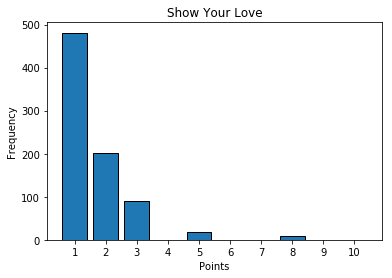

In [5]:
plt.bar(df_count['points'], df_count['count'], edgecolor='k')
plt.xticks(df_count['points'])
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.title('Show Your Love')
plt.savefig('plots/show_your_love.png')
plt.show()

Below you can see the data from the previous holiday event:

In [6]:
df_prev

,points,count,proportion
0,1,289,0.578
1,2,131,0.262
2,3,57,0.114
3,4,0,0.000
4,5,17,0.034
5,6,0,0.000
6,7,0,0.000
7,8,6,0.012
8,9,0,0.000
9,10,0,0.000


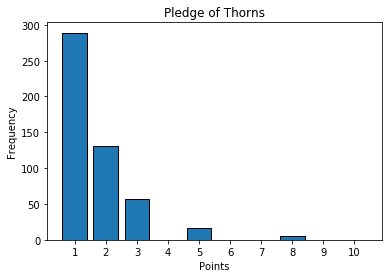

In [7]:
plt.bar(df_prev['points'], df_prev['count'], edgecolor='k')
plt.xticks(df_prev['points'])
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.title('Pledge of Thorns')
plt.savefig('plots/pledge_of_thorns.png')
plt.show()

The point distributions across the two events look very similar and suggests that the critical hit probabilities have not been changed

Although not conclusive, the data also strongly suggests that 4, 6, 7, 9, and 10x critical hits are not possible, as none were observed in either event

## Probabilities

The expected value of a single item is the sum of the point values weighted by their probability. As we derived probabilities from a sample, the expected value will be equal to the mean

For the Valentine's event, the expected value of each item was 1.71 points:

In [8]:
sum(df_prev['points']*df_prev['proportion'])

1.71

In [9]:
sum(df_prev['points']*df_prev['count'])/500

1.71

For the current event, Show Your Love, we can calculate the expected value from our newly collected data, which gives us a value of 1.64

In [10]:
sum(df_count['points']*df_count['proportion'])

1.6425

In [11]:
sum(df_count['points']*df_count['count'])/800

1.6425

### How many items do we need?

If we need a total of 2888 points, and each item provides an average of 1.64 points, then the total number of items needed is 1758:

In [12]:
2888/1.6425

1758.2952815829528

This is higher than the estimated number of items required for the previous event for two (related) reasons:
- In the new event there is a higher probability of the low value 1x crits (i.e. non-crits), and a lower probability of the higher value critical hits (e.g. 3x, 5x, 8x). Overall, this reduces the point value per item for this event
- We have a larger sample size for this analysis, so while it's possible that the probability distribution was adjusted slightly, it's also possible that the data analysis for the previous event was less precise due to having less data

Overall, we're still looking at 1600-1800 required items for event completion

Both the chi square and Kolmogorov-Smirnov tests (below) suggest that the 2 datasets come from the same distribution, and thus the differences we observed above are simply due to difference in sample size/precision. In other words, it's unlikely that the probability distribution of points was changed between the two events

In [13]:
df1 = df_count[['points', 'count']]
df1['sample'] = 'love'

df2 = df_prev[['points', 'count']]
df2['sample'] = 'pledge'

cont = df1.append(df2).reset_index(drop=True)
cont = cont[cont['count'] != 0]
cont = cont.pivot(index='points', columns='sample')

scipy.stats.chi2_contingency(cont['count'])

(1.6769893710965125,
 0.79489316704061408,
 4,
 array([[ 473.84615385,  296.15384615],
        [ 204.92307692,  128.07692308],
        [  90.46153846,   56.53846154],
        [  22.15384615,   13.84615385],
        [   8.61538462,    5.38461538]]))

In [14]:
obs = df_prev[df_prev['count'] != 0]['proportion']
exp = df_count[df_count['count'] != 0]['proportion']
scipy.stats.ks_2samp(obs, exp)

Ks_2sampResult(statistic=0.20000000000000007, pvalue=0.99962170605358336)

# 'Show Your Love' Points over time

In [15]:
df_single = pd.read_excel('data/show_your_love.xlsm', sheet_name='singles')

## Descriptives

In [16]:
print(f'Number of items used: {df_single["item_id"].max()}')
print(f'Total points gained: {df_single["points"].max() - df_single["points"].min()}')

Number of items used: 364
Total points gained: 2339


## Frequencies

In [17]:
df_single_count = df_single.groupby('gain').size()
df_single_count

gain
1.0     35
2.0     19
3.0     15
4.0     27
5.0     27
6.0     33
7.0     43
8.0     56
9.0     49
10.0    59
dtype: int64

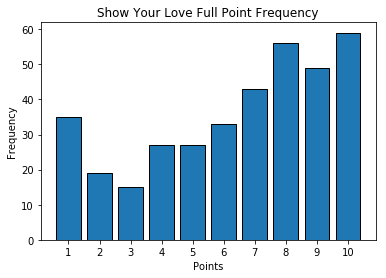

In [22]:
plt.bar(df_single_count.index, df_single_count, edgecolor='k')
plt.xticks(df_single_count.index)
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.title('Show Your Love Full Point Frequency')
plt.savefig('plots/show_your_love_singles.png')
plt.show()

## Points over time

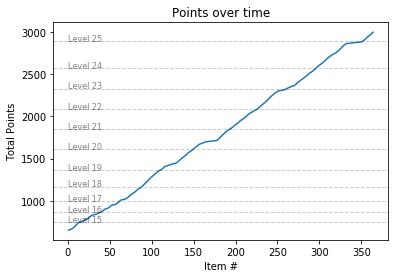

In [19]:
plt.plot(df_single['item_id'], df_single['points'])

for index, row in df_req.iterrows():
    if row['cumsum'] > df_single['points'].min():
        plt.axhline(row['cumsum'], color='k', alpha=0.2,
                    linewidth=1, linestyle='--')
        plt.annotate(f'Level {row["level"]}', (0, row['cumsum']), size=8, alpha=0.5)

plt.title('Points over time')
plt.xlabel('Item #')
plt.ylabel('Total Points')
#plt.tight_layout()
plt.savefig('plots/show_your_love_time.png')
plt.show()

## Critical hits over time

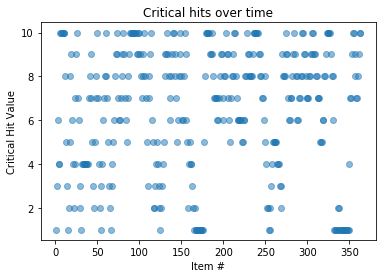

In [20]:
plt.scatter(df_single['item_id'], df_single['gain'], alpha=0.5)
plt.title('Critical hits over time')
plt.xlabel('Item #')
plt.ylabel('Critical Hit Value')
#plt.tight_layout()
plt.savefig('plots/show_your_love_crits.png')
plt.show()

## Average points per item over time

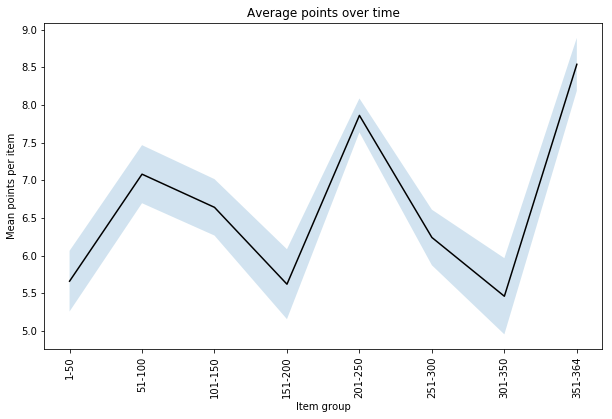

In [21]:
bucket_size = 50
x_labels = []
y = []
y_err = []

for tmp in np.array_split(df_single, range(bucket_size, len(df_single), bucket_size)):
    x_labels.append('{}-{}'.format(tmp['item_id'].min(), tmp['item_id'].max()))
    y.append(tmp['gain'].mean())
    y_err.append(tmp['gain'].sem())
    
y = np.asarray(y)
y_err = np.asarray(y_err)

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(range(len(x_labels)), y, color='k')
ax.fill_between(range(len(x_labels)), y-y_err, y+y_err, alpha=0.2)
ax.set_xticks(np.arange(0, len(x_labels)))
ax.set_xticklabels(x_labels)
ax.tick_params(axis='x', labelrotation=90)
ax.set_xlabel('Item group')
ax.set_ylabel('Mean points per item')
plt.title('Average points over time')
plt.savefig('plots/show_your_love_point_buckets.png')
plt.show()